In [3]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [4]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/data7/brandon/research/DA_MVR/sil_consistent_at_inference


In [5]:
import pprint
import glob
from pathlib import Path


import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import utils

In [6]:
# this notebook takes the shapenet dataset from occnet's repo and adds another folder of renders to each shape (in addition to the one from choy2016)
# the new renders are rendered by pytorch3d
CLASSES_TO_PROCESS = ["03001627"]
# original shapenet v1 dataset 
ORIGINAL_SHAPENET_PATH = "data/example_shapenet"
#ORIGINAL_SHAPENET_PATH = "/data5/drone_machinelearning/Datasets/ShapeNet/core/ShapeNetCore.v1"
# shapenet dataset from occnet repo (has renders from choy, and processed 3d)
OCC_SHAPENET_PATH = "/data7/brandon/research/DA_MVR/occ_net/occupancy_networks/data/ShapeNet"

In [15]:
original_shapenet_model_paths = {}
for curr_class in CLASSES_TO_PROCESS:
    paths = list(Path(os.path.join(ORIGINAL_SHAPENET_PATH, curr_class)).rglob('model_no_tex.obj'))
    #paths = list(Path(os.path.join(ORIGINAL_SHAPENET_PATH, curr_class)).rglob('model.obj'))
    for path in paths:
        original_shapenet_model_paths[str(path).split('/')[-2]] = path
        

In [16]:
pprint.pprint(original_shapenet_model_paths)

{'1a74a83fa6d24b3cacd67ce2c72c02e': PosixPath('data/example_shapenet/03001627/1a74a83fa6d24b3cacd67ce2c72c02e/model_no_tex.obj')}


In [ ]:
device = torch.device("cuda:1")
batch_size = 8
num_azims = 8
# 0.,  45.,  90., 135., 180., 225., 270., 315.
azims = torch.linspace(0, 360, num_azims+1)[:-1]
elevs = torch.ones(num_azims) * 25
dists = torch.ones(num_azims) * 1.7

data/example_shapenet/03001627/1a74a83fa6d24b3cacd67ce2c72c02e/model_no_tex.obj


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


torch.Size([512, 512, 4])


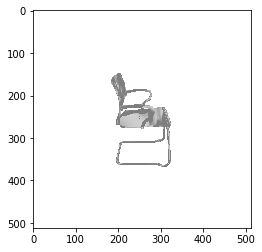

torch.Size([512, 512, 4])


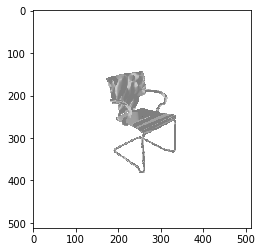

torch.Size([512, 512, 4])


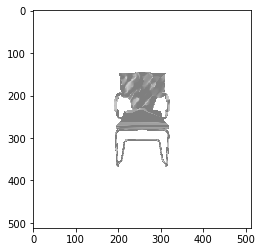

torch.Size([512, 512, 4])


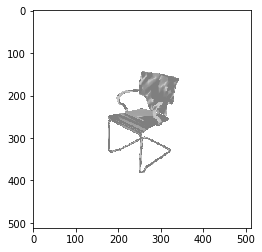

torch.Size([512, 512, 4])


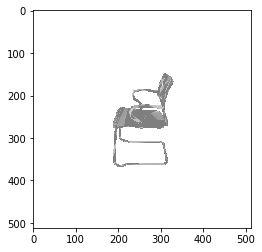

torch.Size([512, 512, 4])


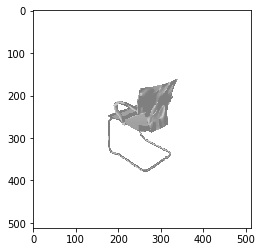

torch.Size([512, 512, 4])


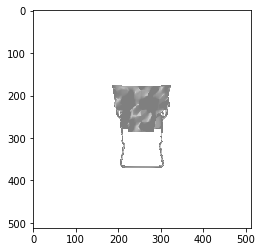

torch.Size([512, 512, 4])


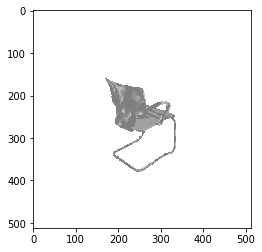

In [20]:
# test -- rendering based on shapenet
for model_name in original_shapenet_model_paths:
    if model_name == "1a74a83fa6d24b3cacd67ce2c72c02e":
        model_path = original_shapenet_model_paths[model_name]
        print(model_path)
        with torch.no_grad():
            mesh = utils.load_untextured_mesh(model_path, device)
            renders = utils.batched_render(mesh, azims, elevs, dists, batch_size, device)
            for render in renders:
                print(render.shape)
                plt.imshow(render[ ..., :3].cpu().numpy())
                plt.show()
        break

In [9]:
# official -- rendering based on occnet
for curr_class in CLASSES_TO_PROCESS:
    for root, dirs, files in os.walk(os.path.join(OCC_SHAPENET_PATH, curr_class)):
        for d in dirs:
            folder_name = os.path.join(root,d)
            if len(folder_name.replace(os.path.join(OCC_SHAPENET_PATH, curr_class), "").split('/')) == 2:
                instance_name = folder_name.split('/')[-1]
                # find corresponding shapenet obj and render it
                shapenet_obj_path = original_shapenet_model_paths[instance_name]
                print(shapenet_obj_path)
                with torch.no_grad():
                    mesh = utils.load_untextured_mesh(shapenet_obj_path, device)
                    renders = utils.batched_render(mesh, azims, elevs, dists, batch_size, device)
                for render in renders:
                    plt.imshow(render[ ..., :3].cpu().numpy())
                    plt.show()
                i+=1
                print(i)
                if i > 1:
                    raise


KeyError: '7905bbf9abc0c264f3443b22038d340'

In [ ]:
for render in renders:
    plt.imshow(render[ ..., :3].cpu().numpy())
    plt.show()

In [ ]:
# todo:
# * fix lighting
# * fix zoom
# * render all